In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso
%matplotlib inline

In [2]:
ruta = "tabla_final.csv"
df = pd.read_csv(ruta)

In [3]:
df.head()

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,...,OPN8,OPN9,OPN10,dateload,introelapse,testelapse,endelapse,country,lat_appx_lots_of_err,long_appx_lots_of_err
0,4.0,1.0,5.0,2.0,5.0,1.0,5.0,2.0,4.0,1.0,...,3.0,4.0,5.0,2016-03-03 02:01:01,9.0,234.0,6,GB,51.5448,0.1991
1,3.0,5.0,3.0,4.0,3.0,3.0,2.0,5.0,1.0,5.0,...,2.0,5.0,3.0,2016-03-03 02:01:20,12.0,179.0,11,MY,3.1698,101.706
2,2.0,3.0,4.0,4.0,3.0,2.0,1.0,3.0,2.0,5.0,...,3.0,4.0,4.0,2016-03-03 02:01:56,3.0,186.0,7,GB,54.9119,-1.3833
3,2.0,2.0,2.0,3.0,4.0,2.0,2.0,4.0,1.0,4.0,...,4.0,3.0,3.0,2016-03-03 02:02:02,186.0,219.0,7,GB,51.75,-1.25
4,3.0,3.0,4.0,2.0,4.0,2.0,2.0,3.0,3.0,4.0,...,4.0,5.0,2.0,2016-03-03 02:02:57,8.0,315.0,17,KE,1.0,38.0


In [4]:
df.dtypes

EXT1                     float64
EXT2                     float64
EXT3                     float64
EXT4                     float64
EXT5                     float64
EXT6                     float64
EXT7                     float64
EXT8                     float64
EXT9                     float64
EXT10                    float64
EST1                     float64
EST2                     float64
EST3                     float64
EST4                     float64
EST5                     float64
EST6                     float64
EST7                     float64
EST8                     float64
EST9                     float64
EST10                    float64
AGR1                     float64
AGR2                     float64
AGR3                     float64
AGR4                     float64
AGR5                     float64
AGR6                     float64
AGR7                     float64
AGR8                     float64
AGR9                     float64
AGR10                    float64
CSN1      

In [5]:
aux = df[['introelapse','testelapse','endelapse','lat_appx_lots_of_err','long_appx_lots_of_err']]

In [6]:
aux.dropna(inplace = True)

/home/diegoias/Documents/CieciaDatos/cdd/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [7]:
aux.reset_index(drop = True,inplace=True)

In [8]:
aux.head()

,introelapse,testelapse,endelapse,lat_appx_lots_of_err,long_appx_lots_of_err
0,9.0,234.0,6,51.5448,0.1991
1,12.0,179.0,11,3.1698,101.706
2,3.0,186.0,7,54.9119,-1.3833
3,186.0,219.0,7,51.75,-1.25
4,8.0,315.0,17,1.0,38.0


In [9]:
aux.lat_appx_lots_of_err.replace({"NONE":np.nan},inplace=True)
aux.long_appx_lots_of_err.replace({"NONE":np.nan},inplace=True)

/home/diegoias/Documents/CieciaDatos/cdd/lib/python3.6/site-packages/pandas/core/generic.py:6786: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [10]:
aux.dropna(inplace = True)

/home/diegoias/Documents/CieciaDatos/cdd/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [11]:
aux.reset_index(drop = True,inplace=True)

In [12]:
aux = aux.astype(float)

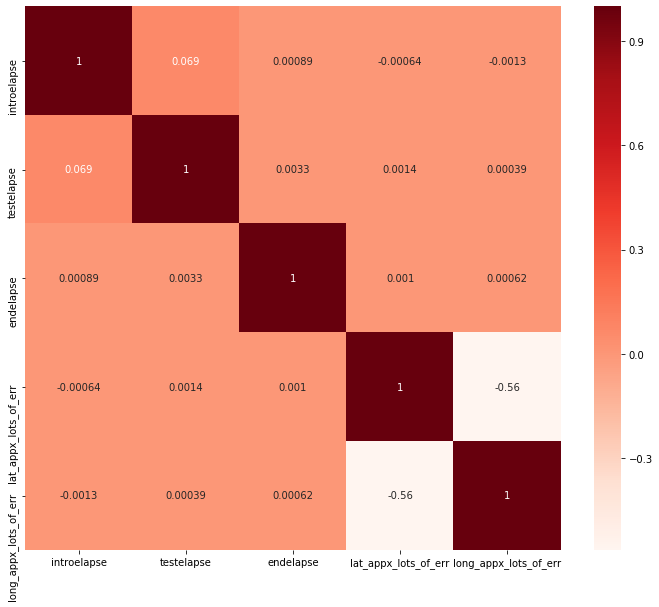

In [13]:
plt.figure(figsize=(12,10))
cor = aux.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [14]:
cor_target = abs(cor['testelapse'])
relevant_features = cor_target[cor_target > 0.5]
relevant_features

testelapse    1.0
Name: testelapse, dtype: float64

no existen variables con este dataset ademas de por que la mayoria de las variables eran categoricas

In [15]:
var = list(aux.columns)
var = [x for x in var if x != 'testelapse']

In [16]:
X = aux[var]
y = aux['testelapse']

In [17]:
#Backward Elimination
x_1 = sm.add_constant(X)
model = sm.OLS(y,x_1).fit()
model.pvalues.sort_values(ascending=False)

/home/diegoias/Documents/CieciaDatos/cdd/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


long_appx_lots_of_err    1.959526e-01
lat_appx_lots_of_err     8.563420e-02
endelapse                7.027144e-03
const                    1.790288e-33
introelapse              0.000000e+00
dtype: float64

In [18]:
#Backward Elimination
cols = list(X.columns)
pmax = 1

while (len(cols)>0):
    p = []
    X_1 = X[cols]
    X_1 = sm.add_constant(X_1)
    model = sm.OLS(y,X_1).fit()
    p = pd.Series(model.pvalues.values[1:],index = cols)      
    pmax = max(p)
    feature_with_p_max = p.idxmax()
    if(pmax > 0.05):
        cols.remove(feature_with_p_max)
    else:
        break
        
selected_features_BE = cols
print(selected_features_BE)

['introelapse', 'endelapse']


In [19]:
model = LinearRegression()
#Metodo RFE
rfe = RFE(model,7,verbose=1)
X_rfe = rfe.fit_transform(X,y)

#Encontrando el modelo de los datos
model.fit(X_rfe,y)
print(rfe.support_)
print(rfe.ranking_)

[ True  True  True  True]
[1 1 1 1]


In [20]:
#numero de caracteristicas
nof_list = np.arange(1,4)
high_score = 0

#proceso para almacenar las caracteristicas óptimas
nof = 0
score_list =[]

for n in range(len(nof_list)):
    print(n)
    X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 0)
    model = LinearRegression()
    rfe = RFE(model,nof_list[n])
    X_train_rfe = rfe.fit_transform(X_train,y_train)
    X_test_rfe = rfe.transform(X_test)
    model.fit(X_train_rfe,y_train)
    score =model.score(X_test_rfe,y_test)
    score_list.append(score)
    if(score > high_score):
        high_score = score
        nof = nof_list[n]
print("Numero optimo de caracteristicas: %d"%nof)
print("Desempeño con %d caracteristicas: %f"%(nof,high_score))

0
1
2
Numero optimo de caracteristicas: 3
Desempeño con 3 caracteristicas: 0.003652


In [24]:
cols = list(X.columns)
model = LinearRegression()
rfe = RFE(model,3)
X_rfe = rfe.fit_transform(X,y)

model.fit(X_rfe,y)
temp = pd.Series(rfe.support_,index=cols)
selected_features_rfe = temp[temp==True].index

print(selected_features_rfe)

Index(['introelapse', 'lat_appx_lots_of_err', 'long_appx_lots_of_err'], dtype='object')
